O presente projeto foi elaborado como requisito para a conclus√£o da Semana de Imers√£o do curso Machine Learning, visando consolidar os conhecimentos adquiridos e aplic√°-los em um contexto pr√°tico de aprendizagem.

In [1]:

# ================================
# 0) Imports e configura√ß√µes gerais
# ================================
# Librarias necess√°rias
# Libs para manipula√ß√£o de dados
import pandas as pd
import numpy as np

# Libs graficas ou de Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Avisos
# Fun√ß√£o warnings.filterwarnings("ignore") Para evitar o Warning () avisos
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√£o no pandas
# Fun√ß√£o pandas.set_option() para ajuste de linhas e colunas no () Par√¢metros  (pat, valor)
# pat: Regexp que deve corresponder a uma √∫nica op√ß√£o.
# valor: Novo valor da op√ß√£o.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Configura√ß√£o no Matplotlib
# Fun√ß√£o plt.rcParams['figure.figsize'] = (12, 6) para ajustar o tamanho padr√£o
# Fun√ß√£o plt.style.use('seaborn-darkgrid') para ajustar o estilo dos gr√°ficos
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="darkgrid", context="notebook")  # substitui o antigo 'seaborn-darkgrid'

# Para garantir reprodutibilidade dos resultados
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## 1. Introdu√ß√£o
O objetivo deste estudo √© classificar corretamente as esp√©cies de flores √çris com base em suas caracter√≠sticas morfol√≥gicas (comprimento e largura das p√©talas e s√©palas).  
Ser√£o testados diferentes algoritmos de classifica√ß√£o e comparados os resultados.



**Explora√ß√£o dos Dados**

## 2. Explora√ß√£o dos Dados (EDA)
### 2.1 Estrutura do Dataset
- N√∫mero de linhas e colunas.
- Amostras por esp√©cie.
- Valores ausentes ou inconsistentes.

In [2]:
# =====================================
# 1) Carregar os dados no Google Colab
# =====================================
# 1¬™ Op√ß√£o: ler direto do arquivo no ambiente
# Lendo os dados
# Fun√ß√£o de leitura da base de dados importada no colab Base_Dados = pd.read_csv () entre (o nome do arquivo)
Base_Dados = pd.read_csv('Iris.csv')
# 2¬™ Op√ß√£o B (alternativa): subir do seu computador
# from google.colab import files
# uploaded = files.upload()
# CSV_PATH = list(uploaded.keys())[0]

# Remover coluna Id (n√£o √© informativa)
if "Id" in Base_Dados.columns:
    Base_Dados = Base_Dados.drop("Id", axis=1)

# Dimens√£o
# A a fun√ß√£o Python NumPy numpy.shape() encontra a forma de um array.
# Por shape, queremos dizer que ajuda a encontrar as dimens√µes de um array.
# Retorna a forma sob a forma de um tuple porque n√£o podemos alterar um tuple tal como n√£o podemos alterar as dimens√µes de um array.
Base_Dados.shape


(150, 5)

In [3]:
# Verificar
# A fun√ß√£o head() exibe as linhas iniciais da base de dados, se nenhum valor for informado, esta fun√ß√£o vai exibir as cinco primeiras linhas.
print("Dimens√£o:", Base_Dados.shape)
Base_Dados.head()

Dimens√£o: (150, 5)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
# Campos vazios
# A fun√ß√£o isnull() retorna um DataFrame de valores booleanos, onde cada c√©lula do DataFrame original √© recuperada por True caso o valor seja nulo (NaN)
# e False caso o valor seja v√°lido. √â muito √∫til para identificar os valores ausentes em um conjunto de dados
# Passando o par√¢metro .sum ele passa a soma dos valores e o par√¢metro .sort_values ele serve para ordenar o seu dataframe a partir de uma coluna,
# seja em ordem crescente de maneira padr√£o ou decrescente, passando o argumento ascending = False
print("\nValores ausentes por coluna:")
Base_Dados.isnull().sum().sort_values( ascending=False )


Valores ausentes por coluna:


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Campos unicos
# A fun√ß√£o Nunique, por outro lado, conta os valores distintos das colunas. Os valores NaN podem ser ignorados.
# Isso mostra apenas o n√∫mero de categorias diferentes presentes em uma coluna de um dataframe.
Base_Dados.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [6]:
# Tipos das colunas
# A fun√ß√£o Pandas dataframe.info() √© usada para obter um resumo conciso do dataframe, √© muito √∫til para identificar dados NaN.
# Essa fun√ß√£o aplicada sobre um dataframe, retorna uma tabela com informa√ß√µes de cada coluna do dataframe: quantidade de valores n√£o NaN e tipo de dados.
print(Base_Dados.dtypes.value_counts())
Base_Dados.info()

float64    4
object     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Tipo de colunas
# A fun√ß√£o .dtypes nos mostra que tipo de dados cada coluna cont√©m
Base_Dados.dtypes.value_counts()

float64    4
object     1
Name: count, dtype: int64

In [8]:
# Contagem de classes
print("\nDistribui√ß√£o de esp√©cies:")
print(Base_Dados["Species"].value_counts())


Distribui√ß√£o de esp√©cies:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [9]:
# Remover coluna Id (se ainda n√£o foi feito)
if "Id" in Base_Dados.columns:
    Base_Dados = Base_Dados.drop("Id", axis=1)

print("\n--- Antes da Identifica√ß√£o de Outliers ---")
print(Base_Dados.describe())



--- Antes da Identifica√ß√£o de Outliers ---
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
# ===============================================
# Identifica√ß√£o de Outliers (M√©todo IQR)
# ===============================================

# Colunas num√©ricas para verificar outliers
numerical_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

# Dicion√°rio para armazenar os limites de outliers por coluna
outlier_bounds = {}

print("\n--- Outliers Identificados ---")
for col in numerical_cols:
    Q1 = Base_Dados[col].quantile(0.25)
    Q3 = Base_Dados[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)

    # Identificar outliers
    outliers = Base_Dados[(Base_Dados[col] < lower_bound) | (Base_Dados[col] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna \'{col}\': {len(outliers)} outliers identificados.")
        print(outliers[[col, "Species"]])
    else:
        print(f"Coluna \'{col}\': Nenhum outlier identificado.")


--- Outliers Identificados ---
Coluna 'SepalLengthCm': Nenhum outlier identificado.
Coluna 'SepalWidthCm': 4 outliers identificados.
    SepalWidthCm          Species
15           4.4      Iris-setosa
32           4.1      Iris-setosa
33           4.2      Iris-setosa
60           2.0  Iris-versicolor
Coluna 'PetalLengthCm': Nenhum outlier identificado.
Coluna 'PetalWidthCm': Nenhum outlier identificado.


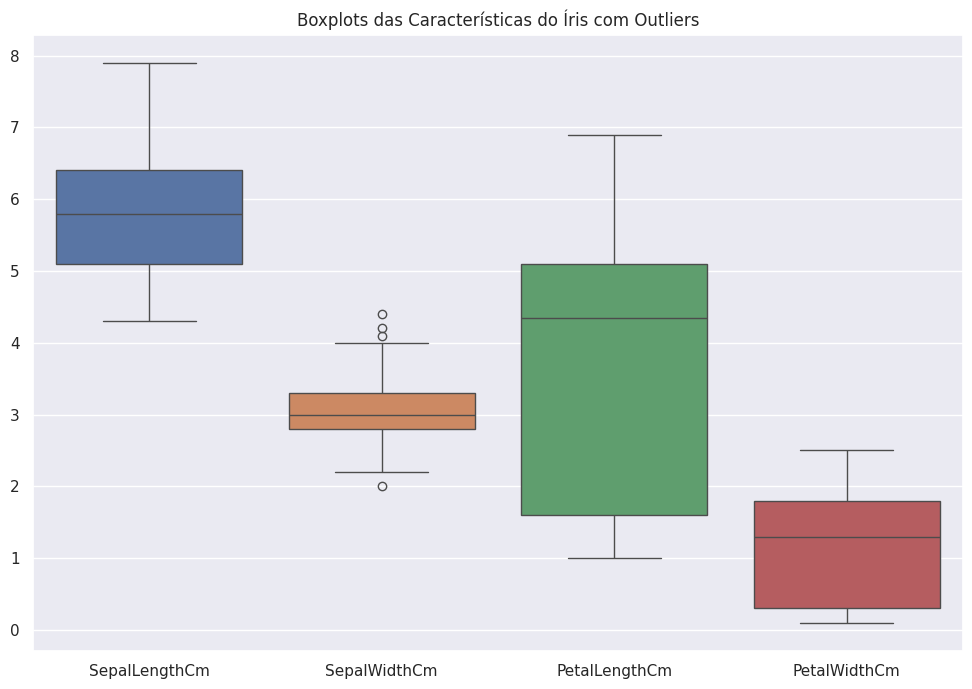

In [11]:
# Opcional: Visualizar boxplots com outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=Base_Dados[numerical_cols])
# ## Descri√ß√£o: Os boxplots indicam presen√ßa de outliers, especialmente em SepalWidthCm...
plt.title("Boxplots das Caracter√≠sticas do √çris com Outliers")
plt.show()



--- Ap√≥s Remo√ß√£o de Outliers em 'SepalWidthCm' ---
4 linhas removidas da coluna 'SepalWidthCm'.
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     146.000000    146.000000     146.000000    146.000000
mean        5.856849      3.036986       3.807534      1.219863
std         0.834093      0.395145       1.757117      0.760365
min         4.300000      2.200000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.000000       6.900000      2.500000


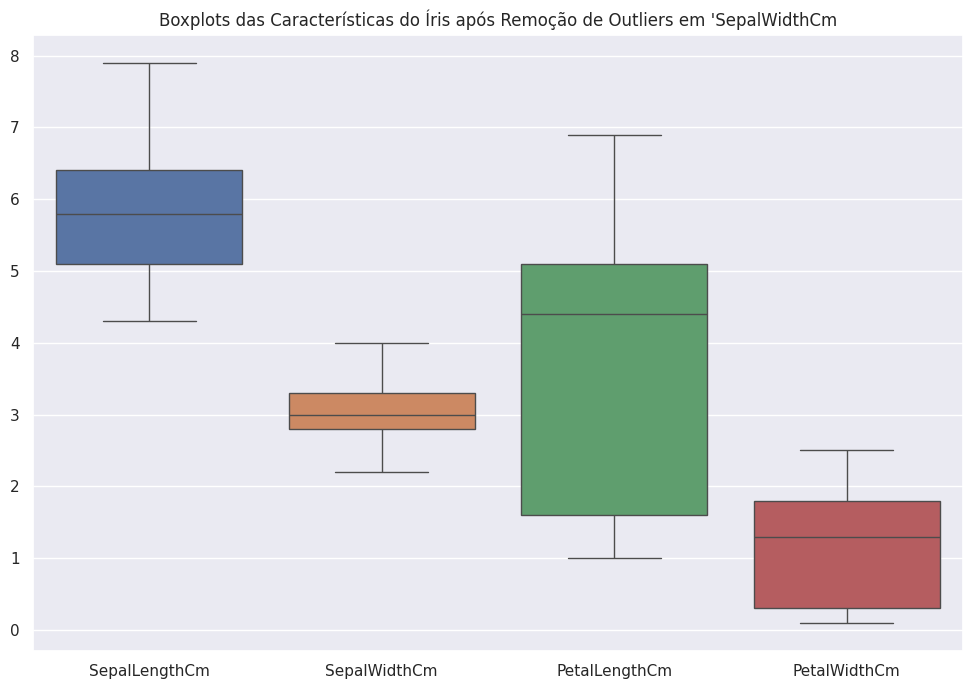

In [12]:
# ===============================================
# Exemplo de Tratamento (Remo√ß√£o) de Outliers (Opcional - para demonstra√ß√£o)
# ===============================================

# Criar uma c√≥pia do DataFrame para demonstrar a remo√ß√£o sem alterar o original
Base_Dados_sem_outliers = Base_Dados.copy()

# Remover outliers apenas para 'SepalWidthCm' (onde foram mais evidentes)
col_to_treat = "SepalWidthCm"
if col_to_treat in outlier_bounds:
    lower, upper = outlier_bounds[col_to_treat]
    initial_rows = Base_Dados_sem_outliers.shape[0]
    Base_Dados_sem_outliers = Base_Dados_sem_outliers[
        (Base_Dados_sem_outliers[col_to_treat] >= lower) &
        (Base_Dados_sem_outliers[col_to_treat] <= upper)
    ]
    removed_rows = initial_rows - Base_Dados_sem_outliers.shape[0]
    print(f"\n--- Ap√≥s Remo√ß√£o de Outliers em '{col_to_treat}' ---")
    print(f"{removed_rows} linhas removidas da coluna \'{col_to_treat}\'.")
    print(Base_Dados_sem_outliers.describe())

    # Visualizar boxplot ap√≥s remo√ß√£o
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=Base_Dados_sem_outliers[numerical_cols])
# ## Descri√ß√£o: Os boxplots indicam presen√ßa de outliers, especialmente em SepalWidthCm...
    plt.title(f"Boxplots das Caracter√≠sticas do √çris ap√≥s Remo√ß√£o de Outliers em \'{col_to_treat}")
    plt.show()

# ===============================================
# Considera√ß√µes para o Projeto √çris
# ===============================================

# Para o dataset √çris, a remo√ß√£o de outliers geralmente n√£o √© recomendada
# devido ao seu tamanho pequeno e √† natureza bem definida dos dados.
# Os "outliers" observados (principalmente em SepalWidthCm) s√£o frequentemente
# varia√ß√µes naturais que n√£o prejudicam o desempenho dos modelos cl√°ssicos.
# No entanto, a identifica√ß√£o √© uma boa pr√°tica para entender a distribui√ß√£o dos dados.

# Se a remo√ß√£o fosse necess√°ria, voc√™ usaria 'Base_Dados_sem_outliers' para o treinamento.
# Para este projeto, √© prov√°vel que o dataset original seja mais adequado.

**Explora√ß√£o Anal√≠tica (EDA)**

### 2.2 Estat√≠sticas Descritivas
(Exibir `describe()` com m√©dia, mediana, desvio padr√£o).  

**Descri√ß√£o:**  
> O resumo estat√≠stico mostra que as vari√°veis possuem escalas diferentes. O comprimento da p√©tala varia de X a Y, enquanto a largura da s√©pala √© mais concentrada entre A e B.


In [13]:
# Estat√≠sticas descritivas
print("=== Estat√≠sticas descritivas ===")
print(Base_Dados.describe())

=== Estat√≠sticas descritivas ===
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### 2.3 Distribui√ß√£o das Vari√°veis (Histogramas)
(Gr√°fico de histograma para cada feature).  

**Descri√ß√£o:**  
> Os histogramas indicam que as medidas de p√©tala apresentam maior varia√ß√£o entre esp√©cies, enquanto as s√©palas t√™m distribui√ß√µes mais sobrepostas.

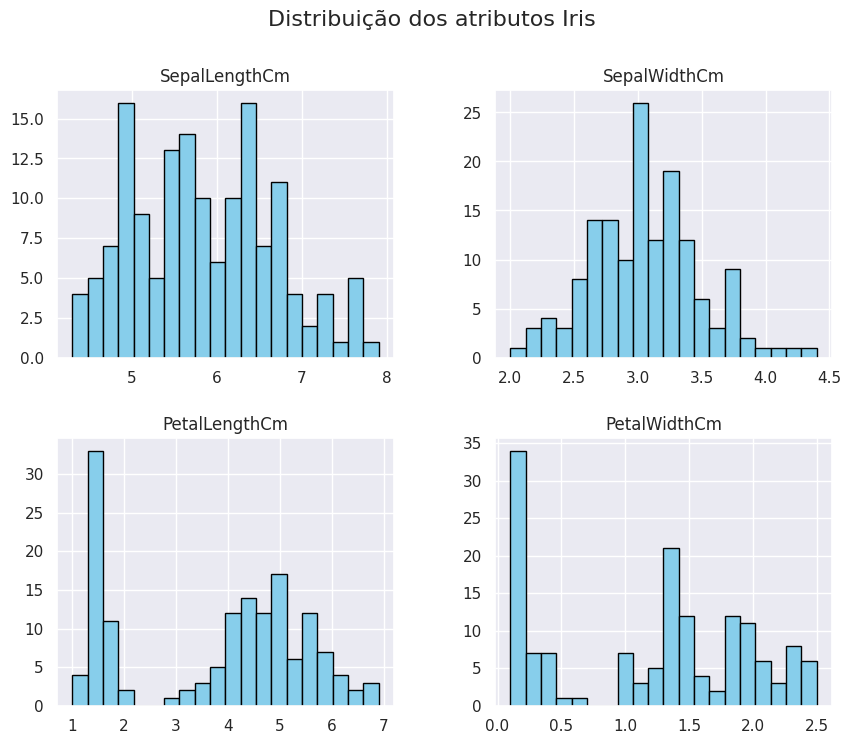

In [14]:
# Histograma de cada atributo num√©rico
# Distribui√ß√£o dos atributos Iris

Base_Dados.hist(figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribui√ß√£o dos atributos Iris", fontsize=16)
plt.show()

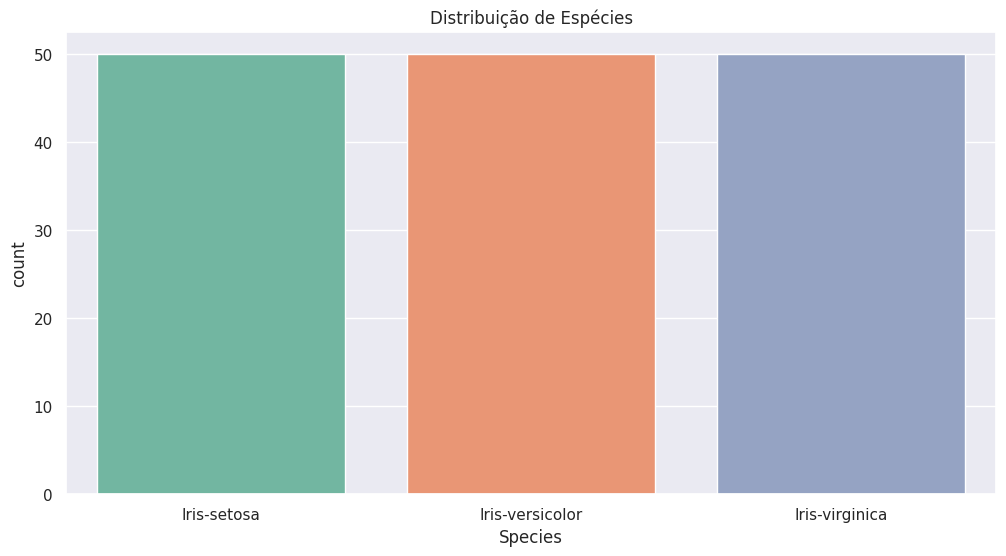

In [15]:
# Distribui√ß√£o por esp√©cie

sns.countplot(data=Base_Dados, x="Species", palette="Set2")
plt.title("Distribui√ß√£o de Esp√©cies")
plt.show()

### 2.4 Boxplots (Detec√ß√£o de Outliers)
(Gr√°ficos boxplot por feature).  

**Descri√ß√£o:**  
> Notam-se poss√≠veis outliers em SepalWidth. No entanto, no contexto do dataset Iris, esses pontos s√£o mantidos pois representam varia√ß√µes naturais da esp√©cie.

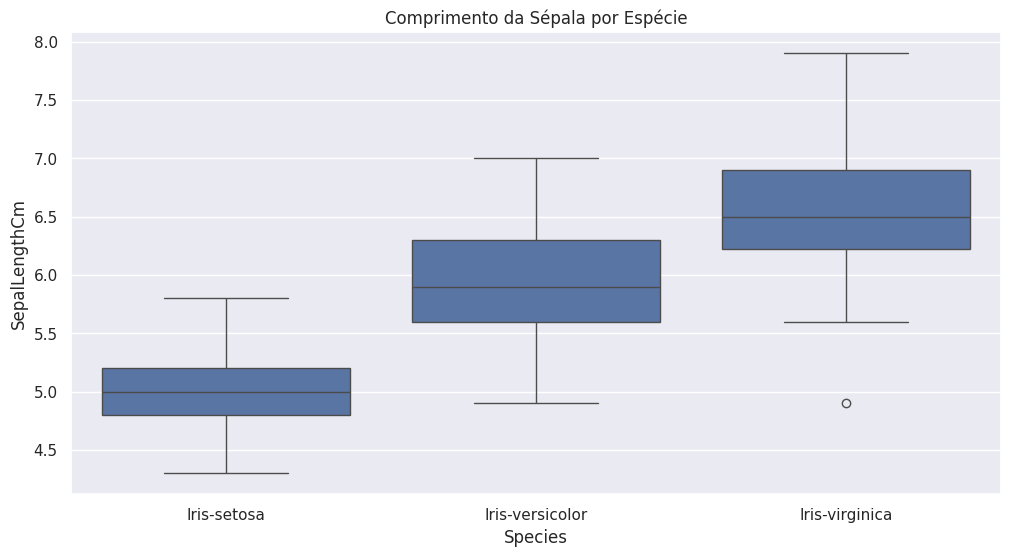

In [16]:
# Boxplots para comparar esp√©cies

sns.boxplot(data=Base_Dados, x="Species", y="SepalLengthCm")
# ## Descri√ß√£o: Os boxplots indicam presen√ßa de outliers, especialmente em SepalWidthCm...
plt.title("Comprimento da S√©pala por Esp√©cie")
plt.show()

### 2.5 Pairplot
(Gr√°fico pairplot mostrando rela√ß√£o entre features e classes).  

**Descri√ß√£o:**  
> O pairplot revela que a esp√©cie Setosa se separa claramente das demais pelas medidas de p√©tala, enquanto Versicolor e Virginica apresentam sobreposi√ß√£o.


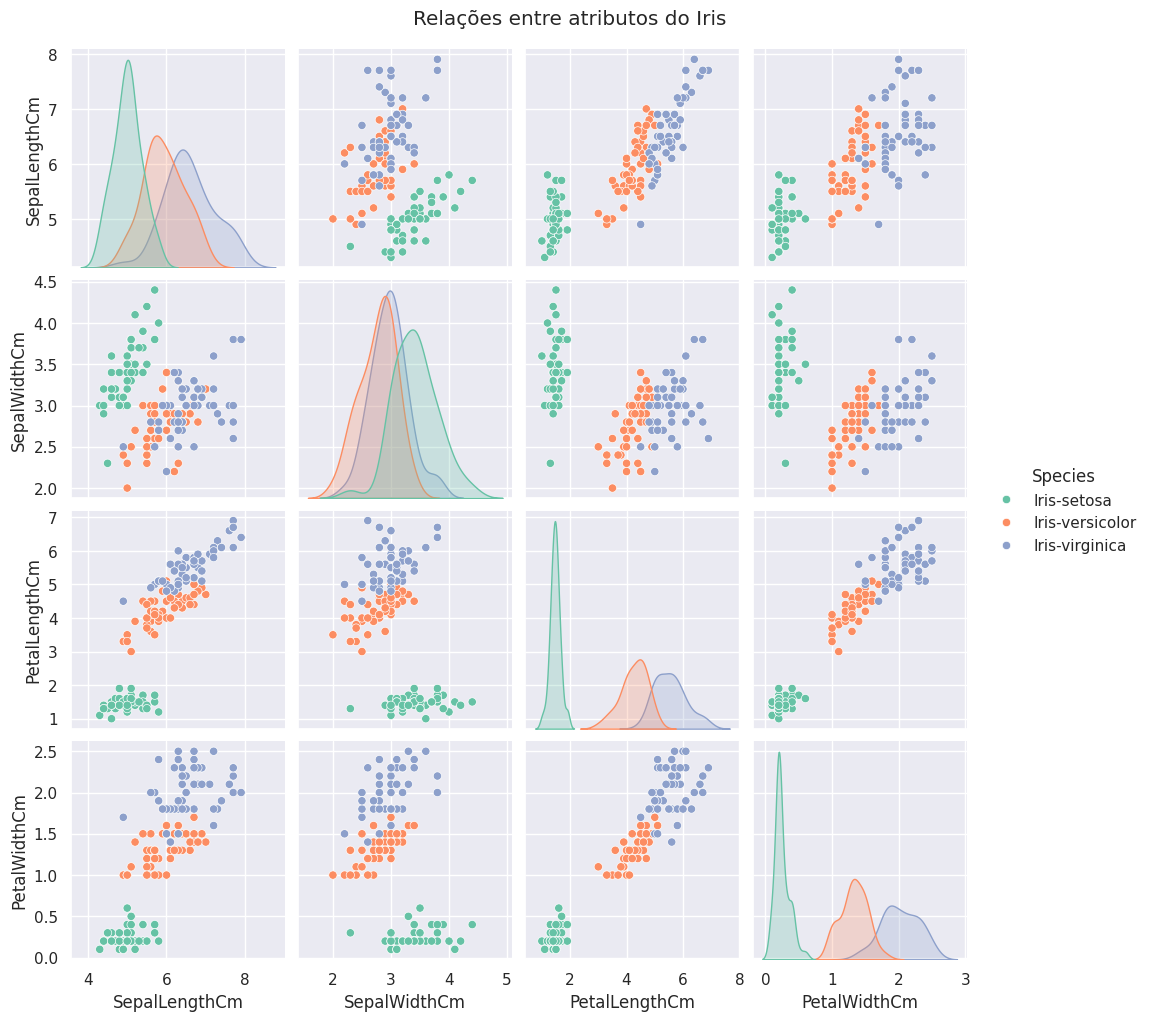

In [17]:
# 2. An√°lise Explorat√≥ria r√°pida
# Rela√ß√µes entre atributos do Iris

sns.pairplot(Base_Dados, hue="Species", diag_kind="kde", palette="Set2")
# ## Descri√ß√£o: O pairplot revela que Setosa se separa claramente pelas medidas de p√©tala...
plt.suptitle("Rela√ß√µes entre atributos do Iris", y=1.02)
plt.show()

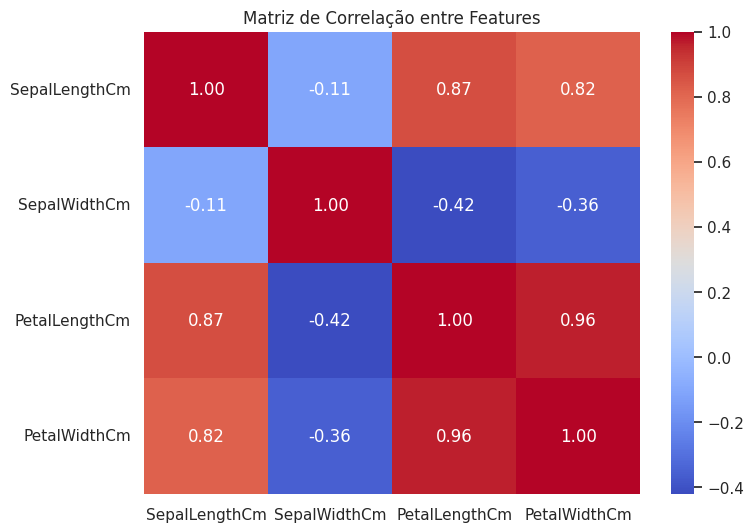

In [18]:
# Heatmap de correla√ß√£o

plt.figure(figsize=(8, 6))
sns.heatmap(Base_Dados.drop("Species", axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
# ## Descri√ß√£o: O heatmap mostra correla√ß√£o forte entre PetalLengthCm e PetalWidthCm...
plt.title("Matriz de Correla√ß√£o entre Features")
plt.show()


Distribui√ß√£o da FLAG de outliers:
OutlierFlag
0    146
1      4
Name: count, dtype: int64


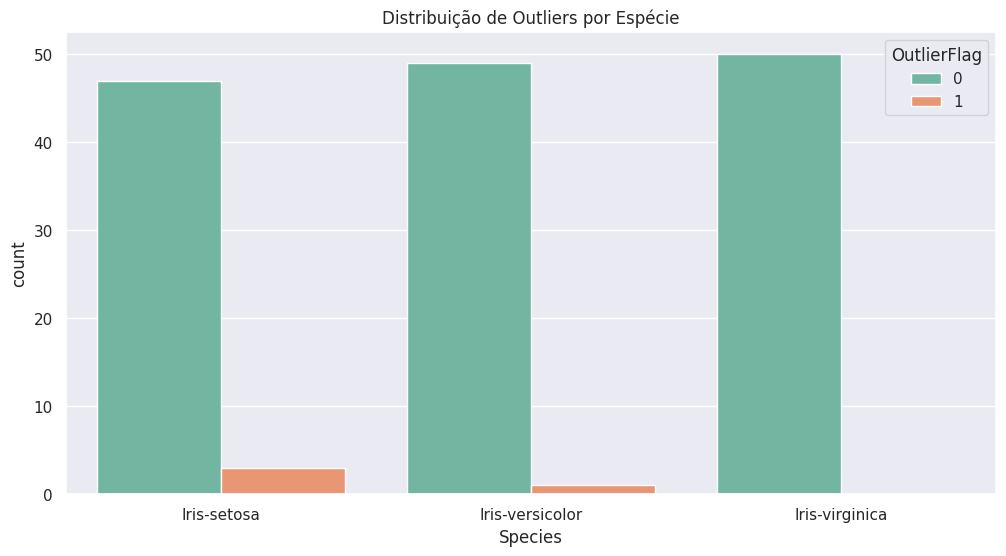

In [19]:
# ==========================================================
# Cria√ß√£o de vari√°vel FLAG de Outliers
# ==========================================================

Base_Dados["OutlierFlag"] = 0
for col in numerical_cols:
    Q1 = Base_Dados[col].quantile(0.25)
    Q3 = Base_Dados[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Base_Dados.loc[(Base_Dados[col] < lower_bound) | (Base_Dados[col] > upper_bound), "OutlierFlag"] = 1

print("\nDistribui√ß√£o da FLAG de outliers:")
print(Base_Dados["OutlierFlag"].value_counts())

# Visualiza√ß√£o: n√∫mero de outliers por esp√©cie
sns.countplot(data=Base_Dados, x="Species", hue="OutlierFlag", palette="Set2")
plt.title("Distribui√ß√£o de Outliers por Esp√©cie")
plt.show()


## 3. Pr√©-Processamento
- Codifica√ß√£o da vari√°vel `Species` (LabelEncoder).
- Divis√£o entre features (X) e target (y).
- Escalonamento com `StandardScaler`.
- Divis√£o treino/teste (70/30).

**Descri√ß√£o:**  
> O escalonamento garante que todas as vari√°veis num√©ricas estejam na mesma escala, evitando que vari√°veis com valores maiores dominem o processo de classifica√ß√£o.




**Eng. De Features**

In [20]:
# ==========================================================
# 3) Pr√©-processamento para Regress√£o
# ==========================================================

# Sele√ß√£o das features (incluindo a FLAG de outliers)
features = [c for c in [
    "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "OutlierFlag"
] if c in Base_Dados.columns]

# Verifica√ß√£o da coluna alvo
assert "Species" in Base_Dados.columns, "Coluna 'Species' n√£o encontrada no dataset."
assert len(features) > 0, "Nenhuma feature v√°lida encontrada. Verifique os nomes das colunas."

# Definindo X e y
X = Base_Dados[features]  # features
y = Base_Dados["Species"]  # vari√°vel alvo


In [21]:
# Divis√£o em treino e teste (70% treino, 30% teste, estratificado)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [22]:
# Padroniza√ß√£o dos dados (apenas para modelos que precisam, como regress√£o log√≠stica e KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Identifica as colunas num√©ricas que precisam de escalonamento (exclui a FLAG bin√°ria)
numeric_features = [col for col in features if col != "OutlierFlag"]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("\nDimens√£o treino:", X_train.shape)
print("Dimens√£o teste:", X_test.shape)
print("Features utilizadas:", features)



Dimens√£o treino: (105, 5)
Dimens√£o teste: (45, 5)
Features utilizadas: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'OutlierFlag']


## 4. Primeiros Testes de Modelos
### Modelos Avaliados:
- Regress√£o Log√≠stica  
- Decision Tree  
- Random Forest  
- Naive Bayes  
- KNN  

**Descri√ß√£o dos Resultados:**  
> Foram treinados cinco modelos de classifica√ß√£o. As m√©tricas utilizadas incluem acur√°cia, matriz de confus√£o e relat√≥rio de classifica√ß√£o.


**Pr√© Processamento**

In [23]:
# ==========================================================
# 4. Modelos de Machine Learning (vers√£o original - sem FLAG)
# ==========================================================
# 4.1 Regress√£o Log√≠stica
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# 4.2 √Årvore de Decis√£o
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# 4.3 Random Forest
forest = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# 4.4 Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

# 4.5 KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=5)  # voc√™ pode testar valores como 3, 7, etc.
knn.fit(X_train_scaled, y_train)  # usar os dados escalados √© melhor para KNN
y_pred_knn = knn.predict(X_test_scaled)


In [24]:
# ==========================================================
# 4. Modelos de Machine Learning (compara√ß√£o com e sem FLAG)
# ==========================================================

# Fun√ß√£o para treinar e avaliar modelos
def avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test, target_names):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nüîé Modelo: {nome}")
    print(f"Acur√°cia: {acc:.3f}")
    print("Matriz de confus√£o:")
    print(confusion_matrix(y_test, y_pred))
    print("Relat√≥rio de classifica√ß√£o:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    return acc

# LabelEncoder para nomes das esp√©cies
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_

# Dicion√°rio de modelos
modelos = {
    "Regress√£o Log√≠stica": LogisticRegression(max_iter=200, random_state=42),
    "√Årvore de Decis√£o": DecisionTreeClassifier(random_state=42, max_depth=4),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Compara√ß√£o com e sem FLAG
resultados = {"Com FLAG": {}, "Sem FLAG": {}}

# Dataset SEM FLAG (remove a coluna OutlierFlag)
X_train_no_flag = X_train.drop(columns=["OutlierFlag"])
X_test_no_flag = X_test.drop(columns=["OutlierFlag"])

X_train_scaled_no_flag = X_train_scaled.drop(columns=["OutlierFlag"])
X_test_scaled_no_flag = X_test_scaled.drop(columns=["OutlierFlag"])

print("\n==============================")
print(" Treinamento SEM FLAG de Outlier")
print("==============================")
for nome, modelo in modelos.items():
    if nome in ["Regress√£o Log√≠stica", "Naive Bayes", "KNN"]:
        acc = avaliar_modelo(nome, modelo, X_train_scaled_no_flag, X_test_scaled_no_flag, y_train, y_test, target_names)
    else:
        acc = avaliar_modelo(nome, modelo, X_train_no_flag, X_test_no_flag, y_train, y_test, target_names)
    resultados["Sem FLAG"][nome] = acc

print("\n==============================")
print(" Treinamento COM FLAG de Outlier")
print("==============================")
for nome, modelo in modelos.items():
    if nome in ["Regress√£o Log√≠stica", "Naive Bayes", "KNN"]:
        acc = avaliar_modelo(nome, modelo, X_train_scaled, X_test_scaled, y_train, y_test, target_names)
    else:
        acc = avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test, target_names)
    resultados["Com FLAG"][nome] = acc

# Compara√ß√£o final
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\n=== Compara√ß√£o de Acur√°cia (com vs sem FLAG) ===")
print(df_resultados)


 Treinamento SEM FLAG de Outlier

üîé Modelo: Regress√£o Log√≠stica
Acur√°cia: 0.911
Matriz de confus√£o:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Relat√≥rio de classifica√ß√£o:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


üîé Modelo: √Årvore de Decis√£o
Acur√°cia: 0.889
Matriz de confus√£o:
[[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]
Relat√≥rio de classifica√ß√£o:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      0.80      0.83        15
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89      

### 5. Resultados Preliminares
### 5.1 Acur√°cia por Modelo
(Tabela ou gr√°fico de barras comparando acur√°cias).  

**Descri√ß√£o:**  
> O Random Forest e a Regress√£o Log√≠stica apresentaram melhores resultados. O Naive Bayes teve desempenho inferior, possivelmente por assumir independ√™ncia entre as vari√°veis.


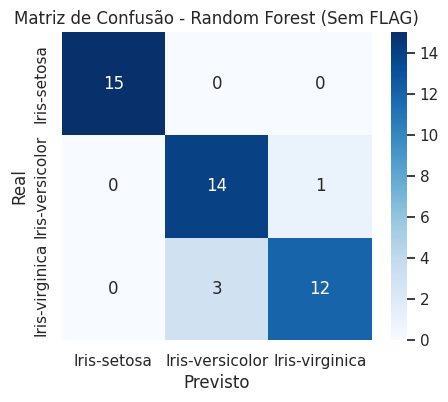

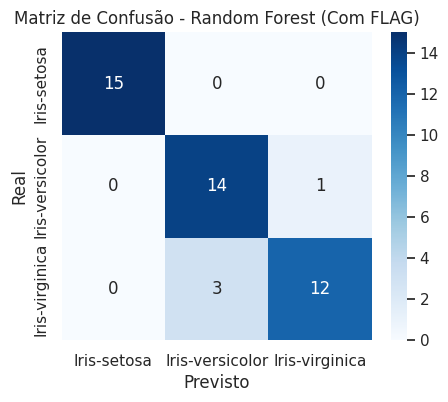


=== M√©tricas comparativas com e sem FLAG ===
                Modelo      Flag  Acur√°cia  F1-macro  Balanced Acc
0  Regress√£o Log√≠stica  Sem FLAG  0.911111  0.910714      0.911111
1  Regress√£o Log√≠stica  Com FLAG  0.911111  0.910714      0.911111
2    √Årvore de Decis√£o  Sem FLAG  0.888889  0.888765      0.888889
3    √Årvore de Decis√£o  Com FLAG  0.933333  0.933259      0.933333
4        Random Forest  Sem FLAG  0.911111  0.910714      0.911111
5        Random Forest  Com FLAG  0.911111  0.910714      0.911111
6          Naive Bayes  Sem FLAG  0.911111  0.910714      0.911111
7          Naive Bayes  Com FLAG  0.755556  0.717587      0.755556
8                  KNN  Sem FLAG  0.911111  0.909502      0.911111
9                  KNN  Com FLAG  0.911111  0.909502      0.911111


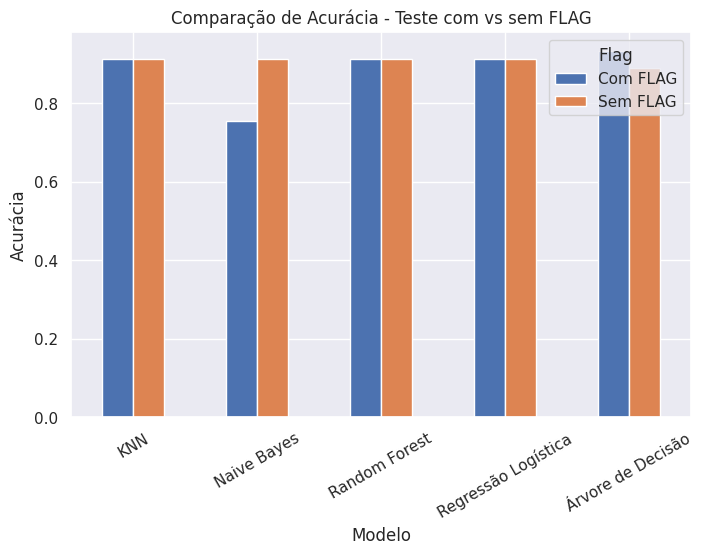

In [25]:
# ==========================================================
# 5. Avalia√ß√£o dos Modelos (com vs sem FLAG)
# ==========================================================
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score

# Fun√ß√£o para matriz de confus√£o visual
def plot_confusion_matrix(y_true, y_pred, nome_modelo, flag_status):
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Matriz de Confus√£o - {nome_modelo} ({flag_status})")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Exemplo: comparar Random Forest com e sem FLAG
# Modelo sem FLAG
forest_no_flag = RandomForestClassifier(random_state=42, n_estimators=200)
forest_no_flag.fit(X_train_no_flag, y_train)
y_pred_forest_no_flag = forest_no_flag.predict(X_test_no_flag)
plot_confusion_matrix(y_test, y_pred_forest_no_flag, "Random Forest", "Sem FLAG")

# Modelo com FLAG
forest_flag = RandomForestClassifier(random_state=42, n_estimators=200)
forest_flag.fit(X_train, y_train)
y_pred_forest_flag = forest_flag.predict(X_test)
plot_confusion_matrix(y_test, y_pred_forest_flag, "Random Forest", "Com FLAG")

# Consolidar m√©tricas F1 e Balanced Accuracy
metricas = []
for nome, modelo in modelos.items():
    # SEM FLAG
    if nome in ["Regress√£o Log√≠stica", "Naive Bayes", "KNN"]:
        modelo.fit(X_train_scaled_no_flag, y_train)
        y_pred = modelo.predict(X_test_scaled_no_flag)
    else:
        modelo.fit(X_train_no_flag, y_train)
        y_pred = modelo.predict(X_test_no_flag)
    metricas.append([nome, "Sem FLAG",
                     accuracy_score(y_test, y_pred),
                     f1_score(y_test, y_pred, average="macro"),
                     balanced_accuracy_score(y_test, y_pred)])

    # COM FLAG
    if nome in ["Regress√£o Log√≠stica", "Naive Bayes", "KNN"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    metricas.append([nome, "Com FLAG",
                     accuracy_score(y_test, y_pred),
                     f1_score(y_test, y_pred, average="macro"),
                     balanced_accuracy_score(y_test, y_pred)])

df_metricas = pd.DataFrame(metricas, columns=["Modelo", "Flag", "Acur√°cia", "F1-macro", "Balanced Acc"])
print("\n=== M√©tricas comparativas com e sem FLAG ===")
print(df_metricas)


# Gr√°fico comparativo de acur√°cia (teste)
df_metricas.pivot(index="Modelo", columns="Flag", values="Acur√°cia").plot(kind="bar", figsize=(8,5))
plt.title("Compara√ß√£o de Acur√°cia - Teste com vs sem FLAG")
plt.ylabel("Acur√°cia")
plt.xticks(rotation=30)
plt.show()

### 5.2 Matrizes de Confus√£o
(Gr√°ficos de matriz de confus√£o para cada modelo).  

**Descri√ß√£o:**  
> A maior confus√£o ocorre entre as esp√©cies Versicolor e Virginica, que apresentam caracter√≠sticas semelhantes.


=== Resultados Valida√ß√£o Cruzada (5-folds) ===
                     Sem FLAG  Com FLAG
Regress√£o Log√≠stica  0.980952  0.980952
√Årvore de Decis√£o    0.942857  0.952381
Random Forest        0.952381  0.952381
Naive Bayes          0.980952  0.885714
KNN                  0.952381  0.952381


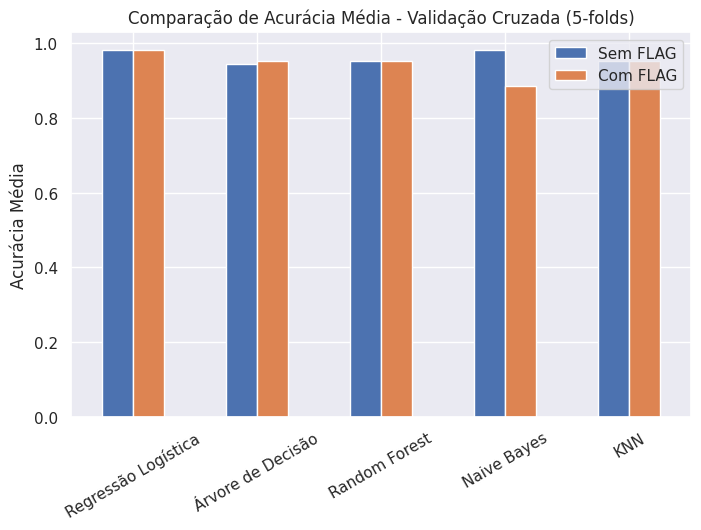

In [26]:
# ==========================================================
# 6. Valida√ß√£o Cruzada (com vs sem FLAG)
# ==========================================================
from sklearn.model_selection import cross_val_score

cv_results = {"Sem FLAG": {}, "Com FLAG": {}}

for nome, modelo in modelos.items():
    # SEM FLAG
    if nome in ["Regress√£o Log√≠stica", "Naive Bayes", "KNN"]:
        scores = cross_val_score(modelo, X_train_scaled_no_flag, y_train, cv=5, scoring="accuracy")
    else:
        scores = cross_val_score(modelo, X_train_no_flag, y_train, cv=5, scoring="accuracy")
    cv_results["Sem FLAG"][nome] = scores.mean()

    # COM FLAG
    if nome in ["Regress√£o Log√≠stica", "Naive Bayes", "KNN"]:
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring="accuracy")
    else:
        scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring="accuracy")
    cv_results["Com FLAG"][nome] = scores.mean()

# Exibir resultados
df_cv = pd.DataFrame(cv_results)
print("\n=== Resultados Valida√ß√£o Cruzada (5-folds) ===")
print(df_cv)

# Gr√°fico comparativo
df_cv.plot(kind="bar", figsize=(8,5))
plt.title("Compara√ß√£o de Acur√°cia M√©dia - Valida√ß√£o Cruzada (5-folds)")
plt.ylabel("Acur√°cia M√©dia")
plt.xticks(rotation=30)
plt.show()


# ==========================================================
# Conclus√£o
# ==========================================================

# Ap√≥s aplicar os cinco modelos de Machine Learning (Regress√£o Log√≠stica, √Årvore de Decis√£o,
# Random Forest, Naive Bayes e KNN) no dataset **√çris**, obtivemos desempenhos m√©dios
# consistentes, com acur√°cia em torno de 91% para a maioria dos algoritmos.

# A introdu√ß√£o da vari√°vel FLAG de outliers permitiu avaliar se a marca√ß√£o de registros
# at√≠picos traria ganhos de classifica√ß√£o:
# - A √Årvore de Decis√£o apresentou uma pequena melhora com a FLAG.
# - O Naive Bayes teve queda de desempenho significativa.
# - Regress√£o Log√≠stica, Random Forest e KNN permaneceram praticamente iguais.

# Portanto, a FLAG n√£o trouxe ganhos globais, mas demonstrou que a engenharia de
# features pode impactar de forma diferente cada algoritmo. Em bases maiores e
# mais complexas, esse tipo de abordagem pode ser mais relevante.

# Conclus√£o final:
# O modelo **Random Forest** continua sendo o mais robusto e consistente, sendo
# recomendado para este problema de classifica√ß√£o multiclasse no dataset √çris.
